<a href="https://colab.research.google.com/github/PerawitDeawpanich/CN334-Template-Perawit/blob/master/SF251_In_Class_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Exercise 3

Once done, upload to MS Teams

## Pokemon Dataset Part 3

Data from https://www.kaggle.com/datasets/cristobalmitchell/pokedex

This time we will plot some comparison plots. (We will learn more plots for comparison next class.)

In [ ]:
!wget https://raw.githubusercontent.com/yongsa-nut/SF251_67_2/refs/heads/main/data/pokemon.csv

In [ ]:
import pandas as pd
from plotnine import *

In [ ]:
#Load the data
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

In [ ]:
pokemon.columns

**Q1**: Create a plot to compare the number of legendary pokemon (`is_legendary`) across all gen.

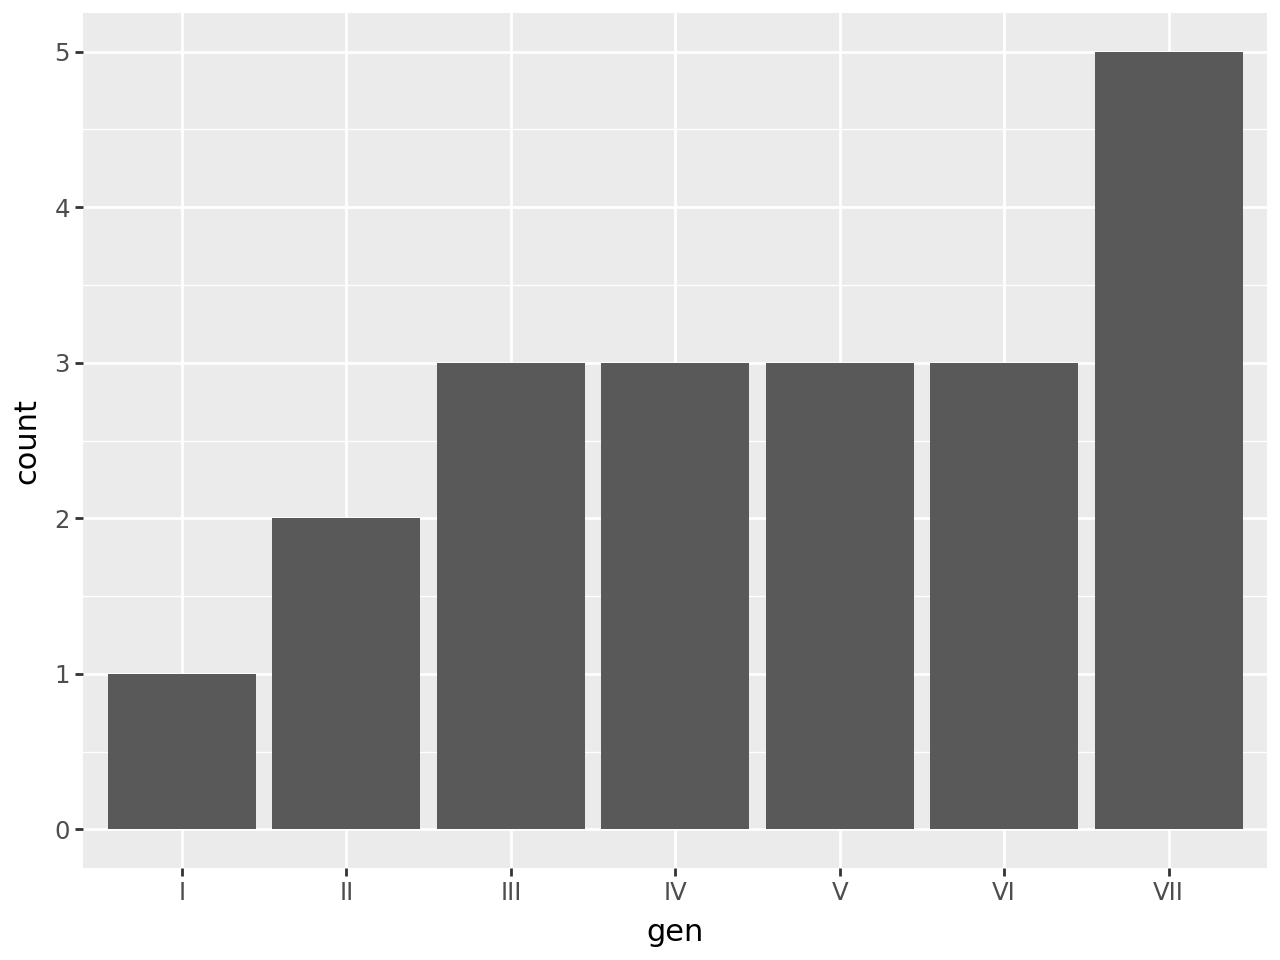

In [ ]:
# Expected result

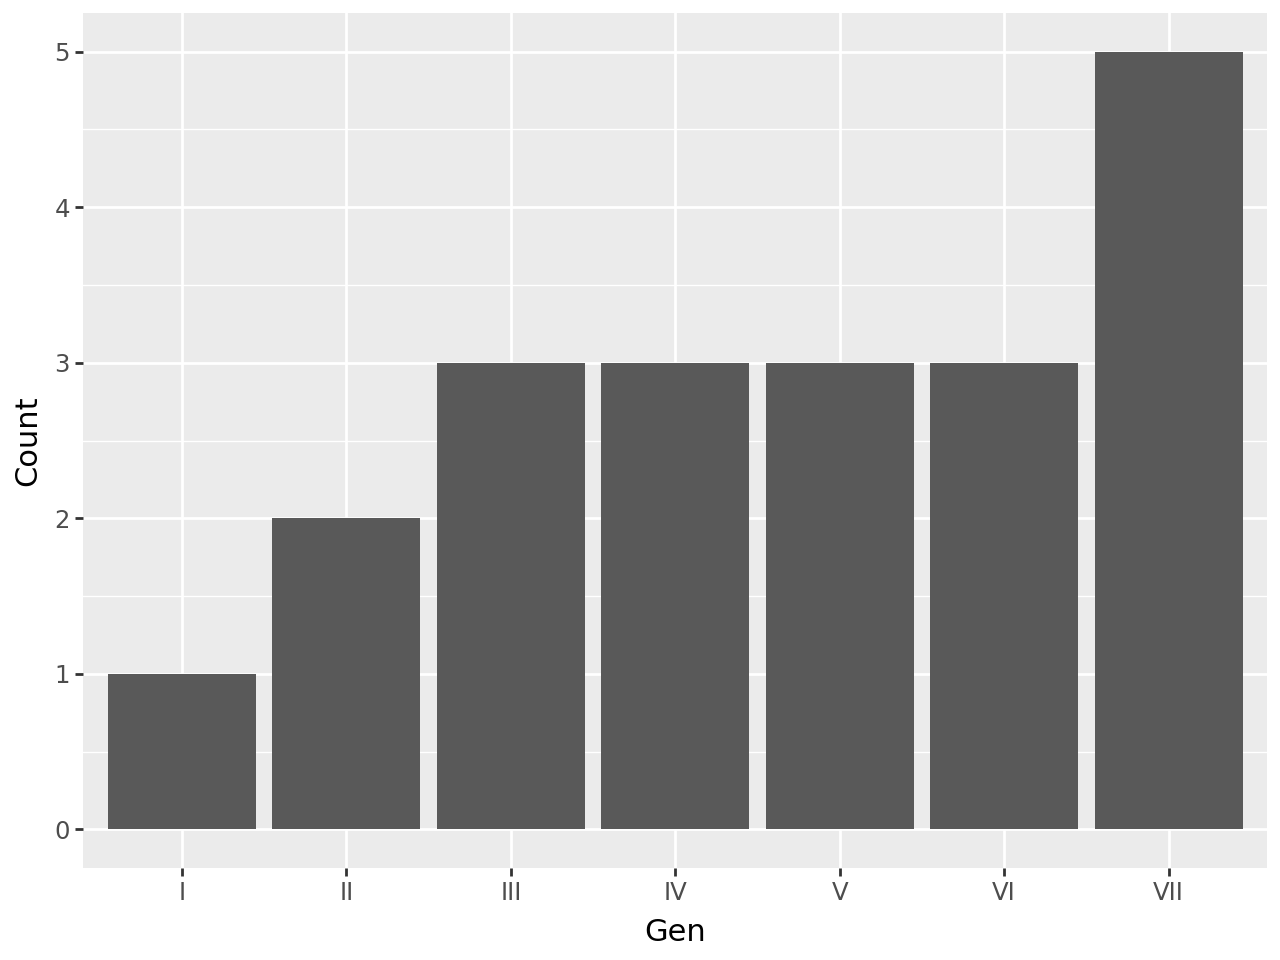

In [27]:
legendary_data = pokemon[pokemon['is_legendary'] == 1]

(
    ggplot(legendary_data, aes(x='gen'))
    + geom_bar()
    + labs(
        x='Gen',
        y='Count'
    )
)

**Q2**: Create a new column `is_special` which is 1 when the pokemon is either legenday (`is_legendary`), sublegendary (`is_sublegendary`), or mythical (`is_mythical`) and 0 otherwise. Then create a plot to compare the number of special pokemon across all gen.

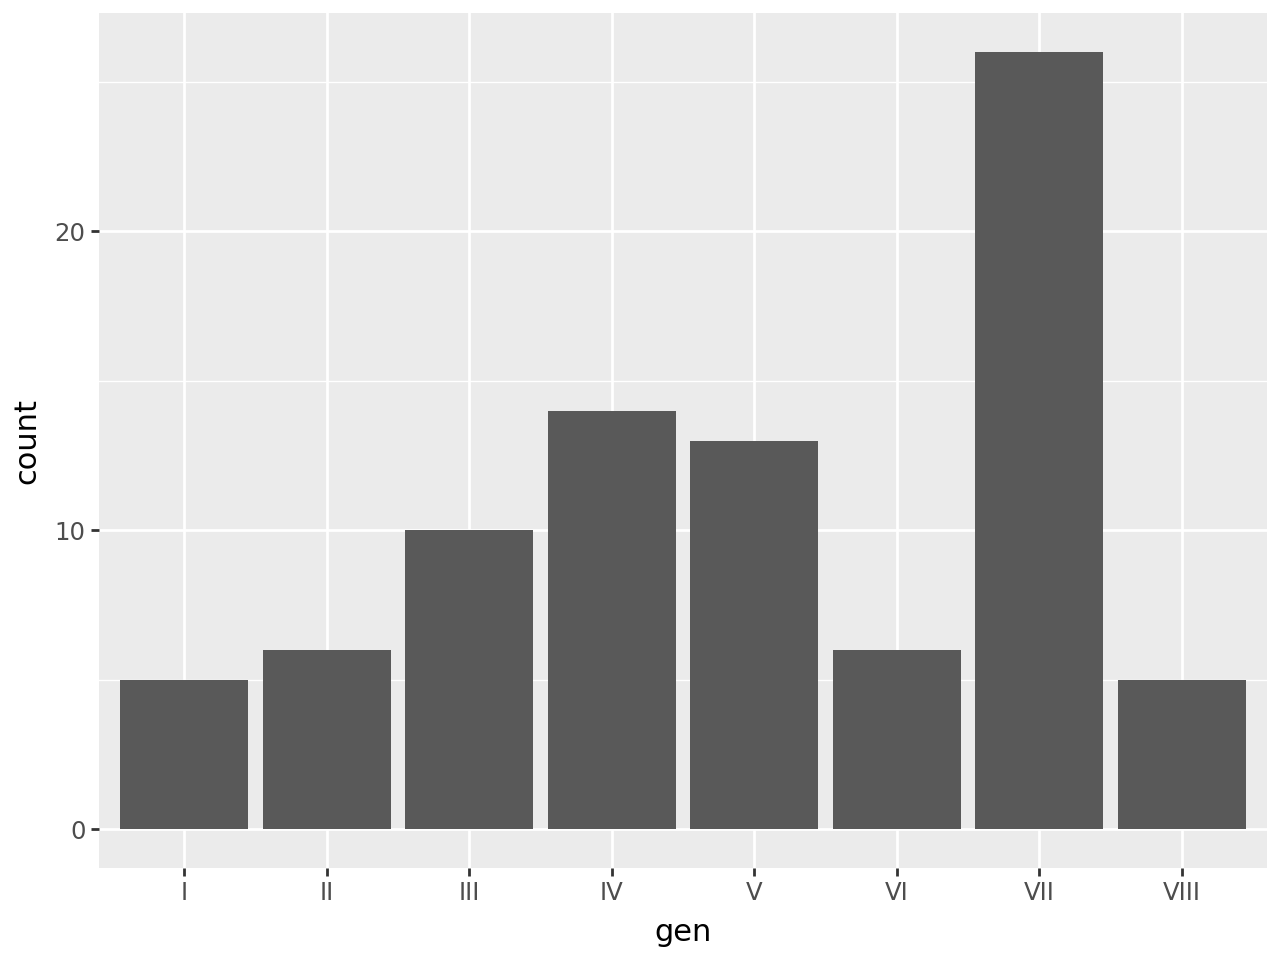

In [ ]:
# Expected result

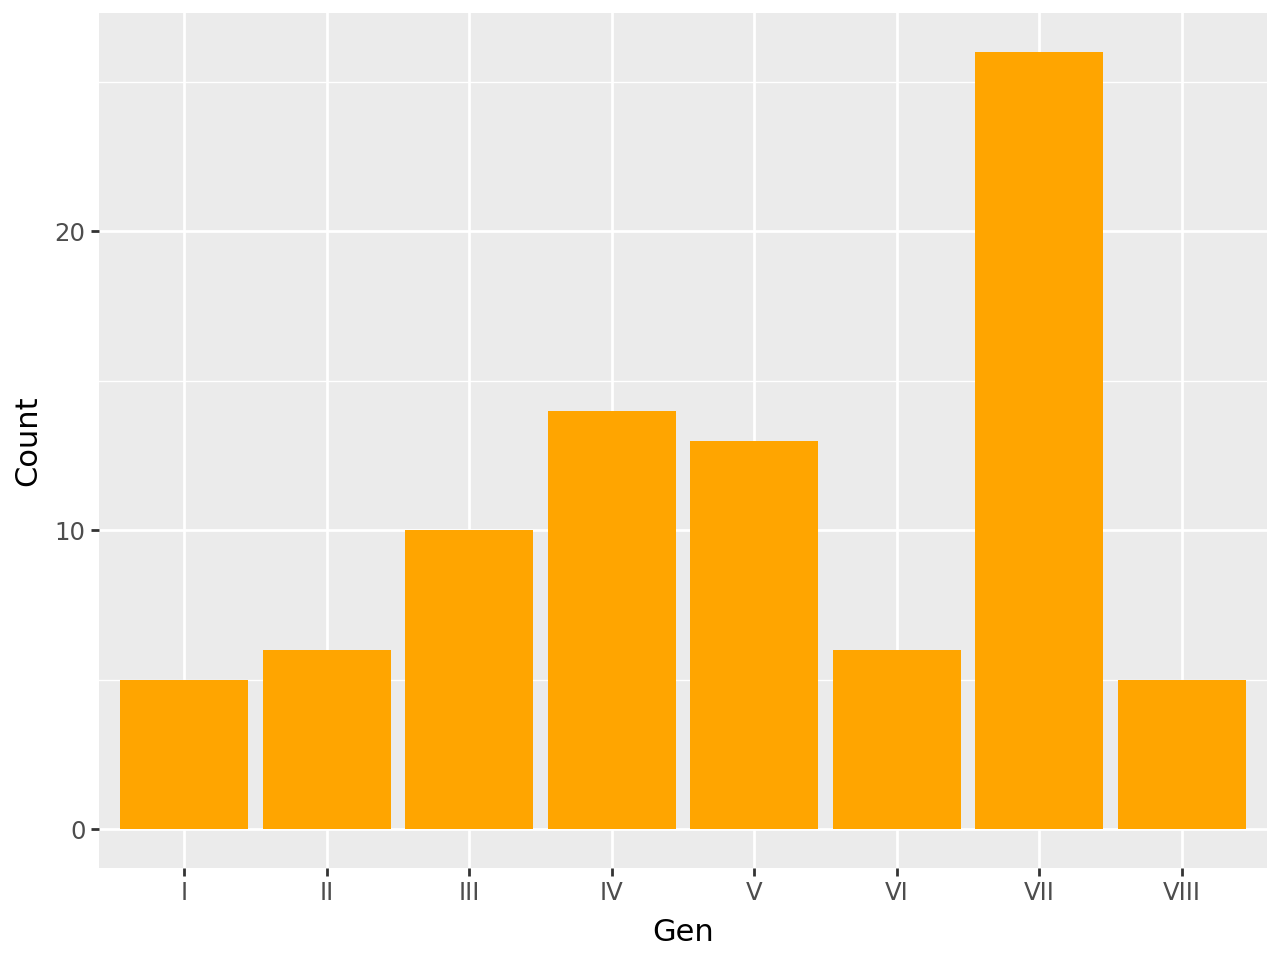

In [26]:
pokemon['is_special'] = (
    (pokemon['is_legendary'] == 1) |
    (pokemon['is_sublegendary'] == 1) |
    (pokemon['is_mythical'] == 1)
).astype(int)

special_by_gen = (
    pokemon
    .groupby('gen')['is_special']
    .sum()
    .reset_index()
)

(
    ggplot(special_by_gen, aes(x='gen', y='is_special'))
    + geom_col(fill='orange')
    + labs(
        x='Gen',
        y='Count'
    )
)

**Q3**: Create a new column `rarity`.
- `rarity` is the rarity of pokemon: `normal`, `sublegendary`, `mythical`, and `legendary`.
  - To do this based on what we learned so far, you can use subset. `pokemon.loc[pokemon['is_legendary']==1, 'rarity'] = 'legendary'`. You will need to create `rarity` column first (e.g., `pokemon['rarity'] = 'normal'`). We will learn other methods in the upcoming lectures.

Create a new barplot similar to Q2 but this time add color based on rarity (`fill = rarity`)


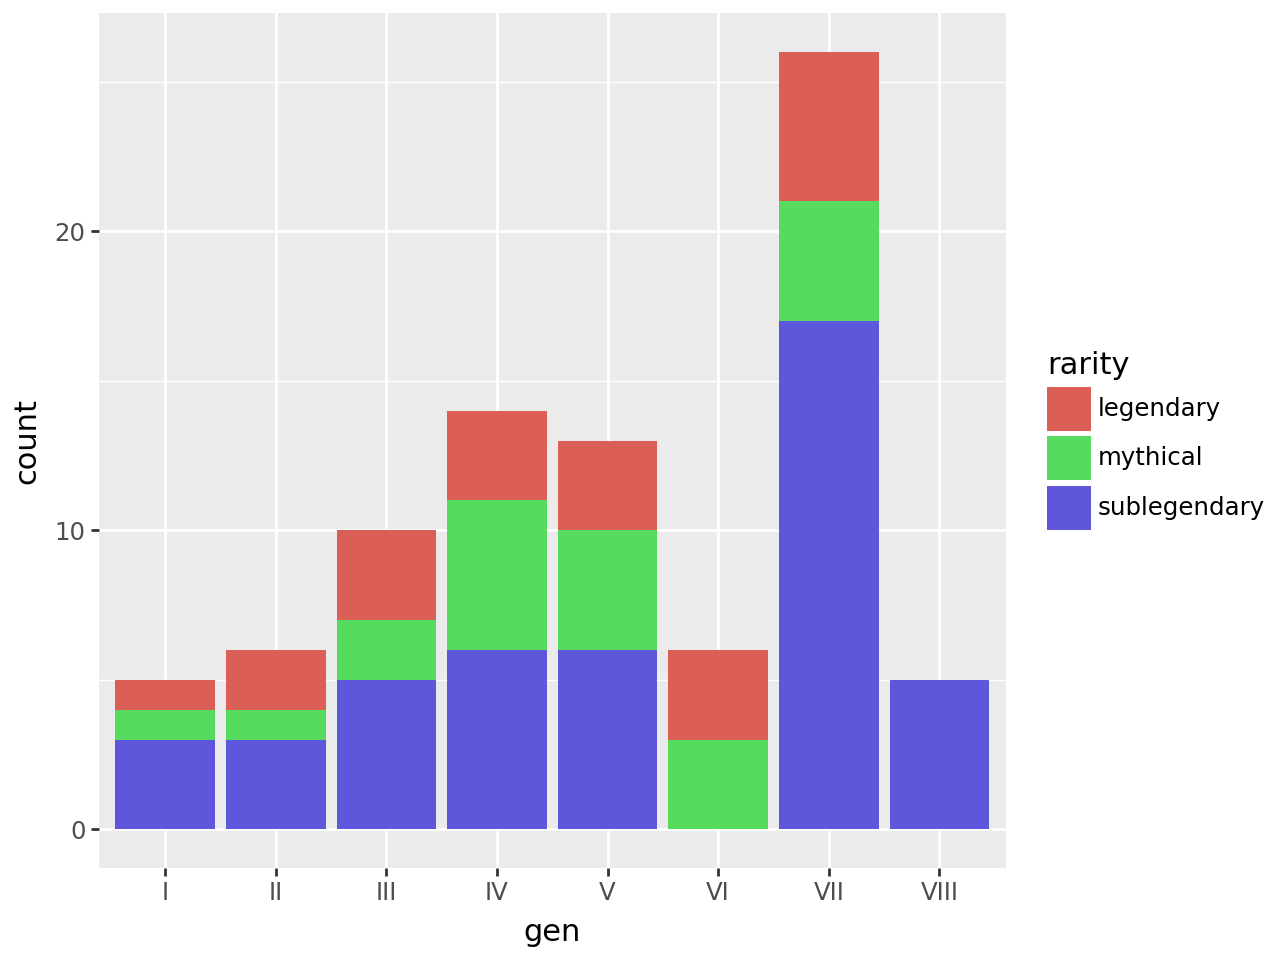

In [ ]:
# Expected result

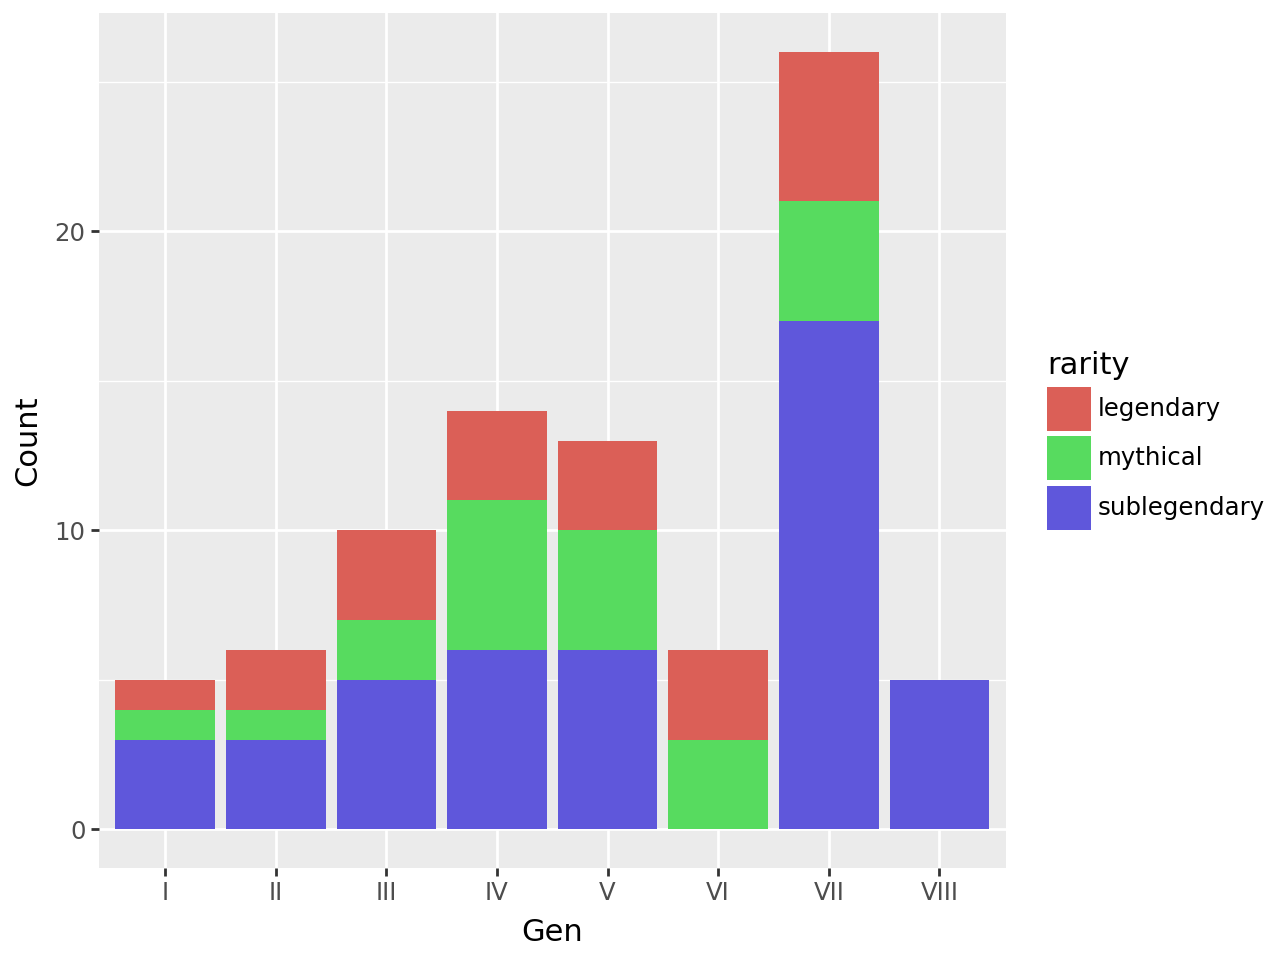

In [30]:
q3_data = pokemon[pokemon['rarity'] != 'normal']
(
    ggplot(q3_data, aes(x='gen', fill='rarity'))
    + geom_bar()
    + labs(
        x='Gen',
        y='Count'
    )
)

**Q4**: Create a plot to compare the number of `fire`, `water`, `grass` primary types between gen 1 and gen 3.
- Make this graph easier to compare betwen gen.
- Note: use `geom_bar(position='dodge')` to make the graph easier to compare

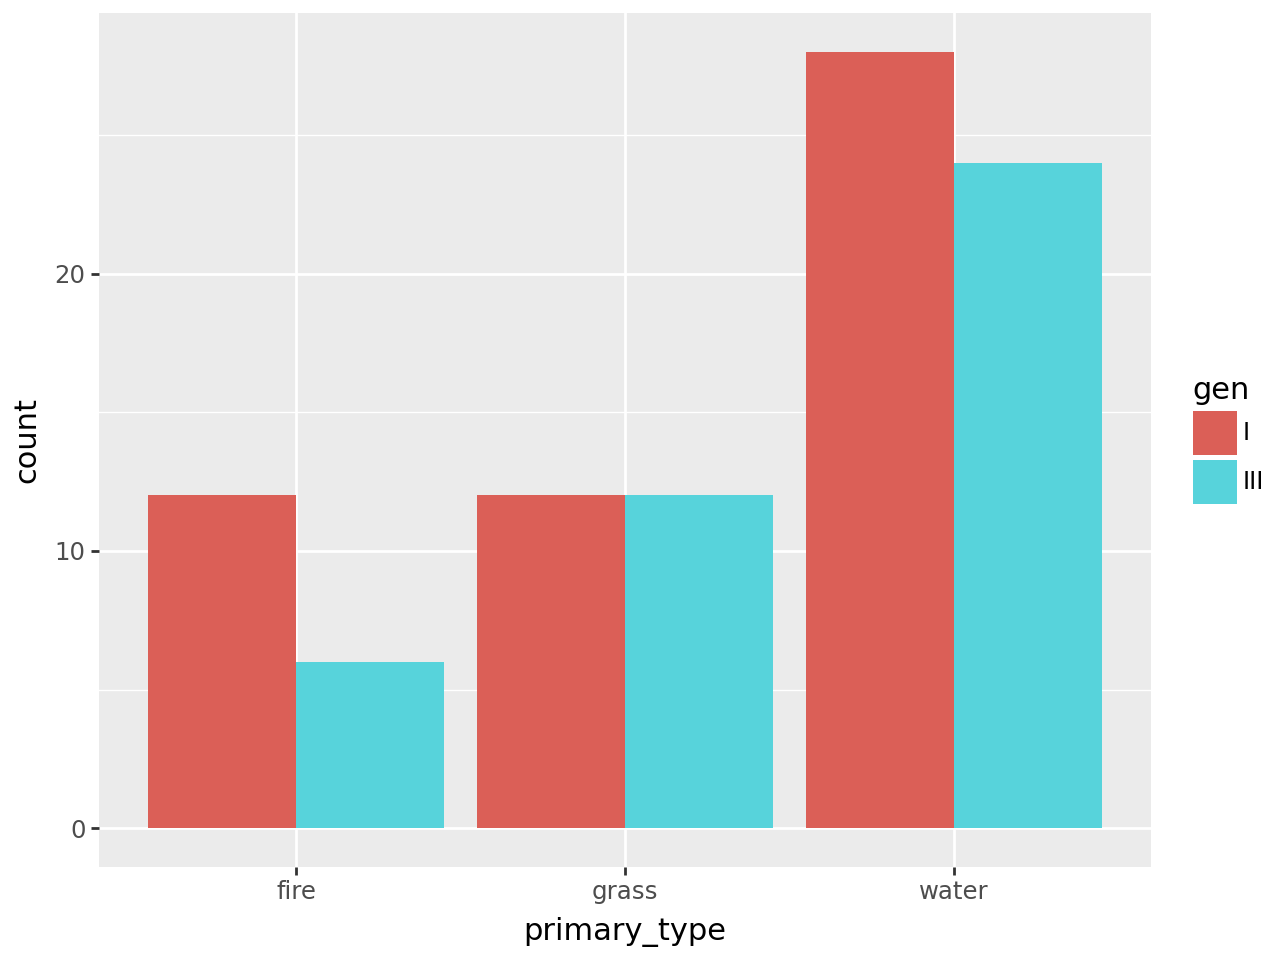

In [ ]:
# Expected Result

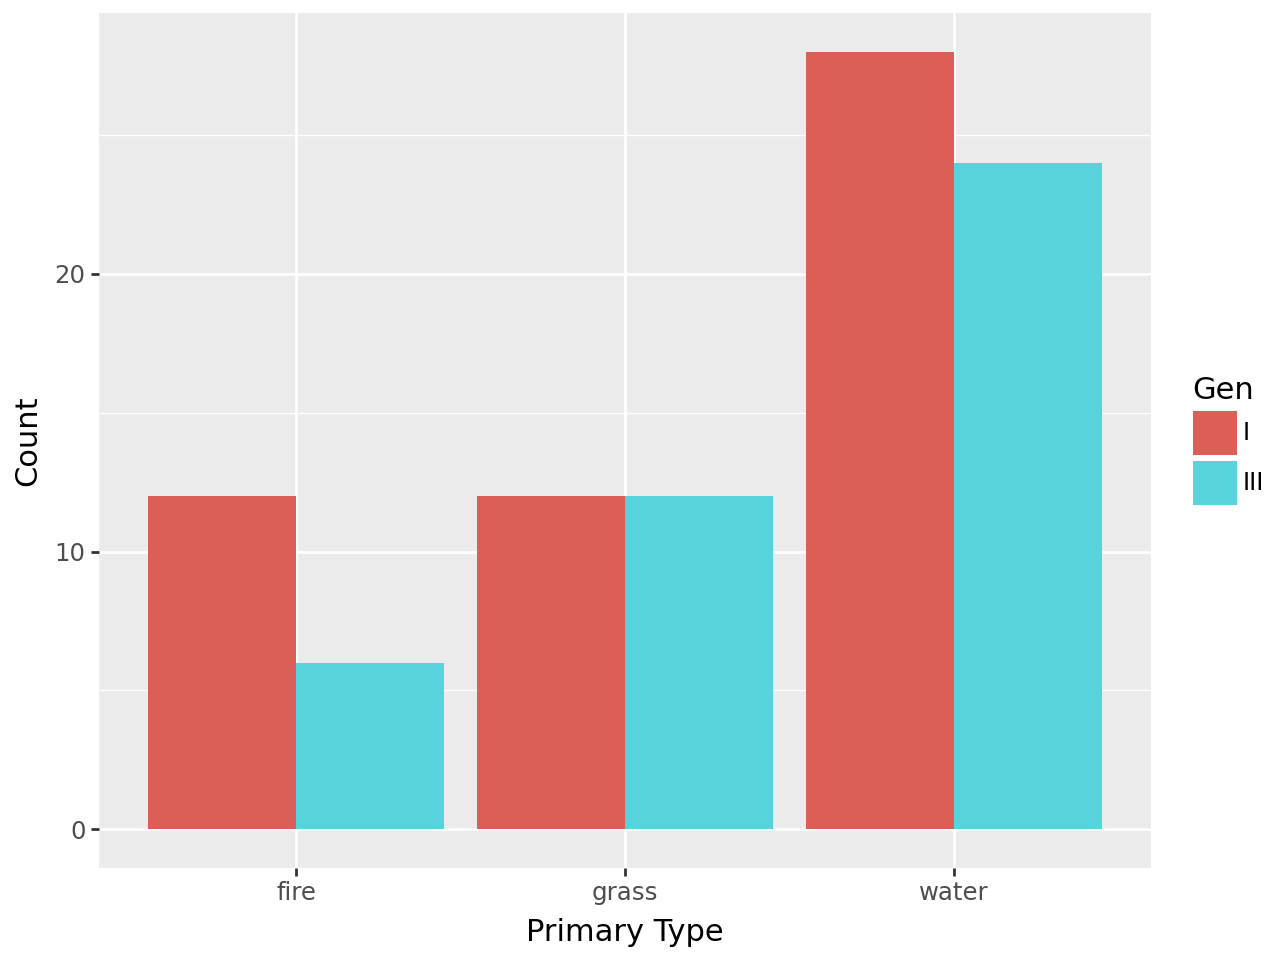

In [32]:
q4_data = pokemon[
    (pokemon['gen'].isin(['I', 'III'])) &
    (pokemon['primary_type'].isin(['fire', 'water', 'grass']))
]
(
    ggplot(q4_data, aes(x='primary_type', fill='gen'))
    + geom_bar(position='dodge')
    + labs(
        x='Primary Type',
        y='Count',
        fill='Gen'
    )
)

**Q5**: Create a plot to compare the number of `fire`, `water`, `grass` primary types across all gen. This time make it easier to compare between type within each gen. (We will learn a better way next class.)

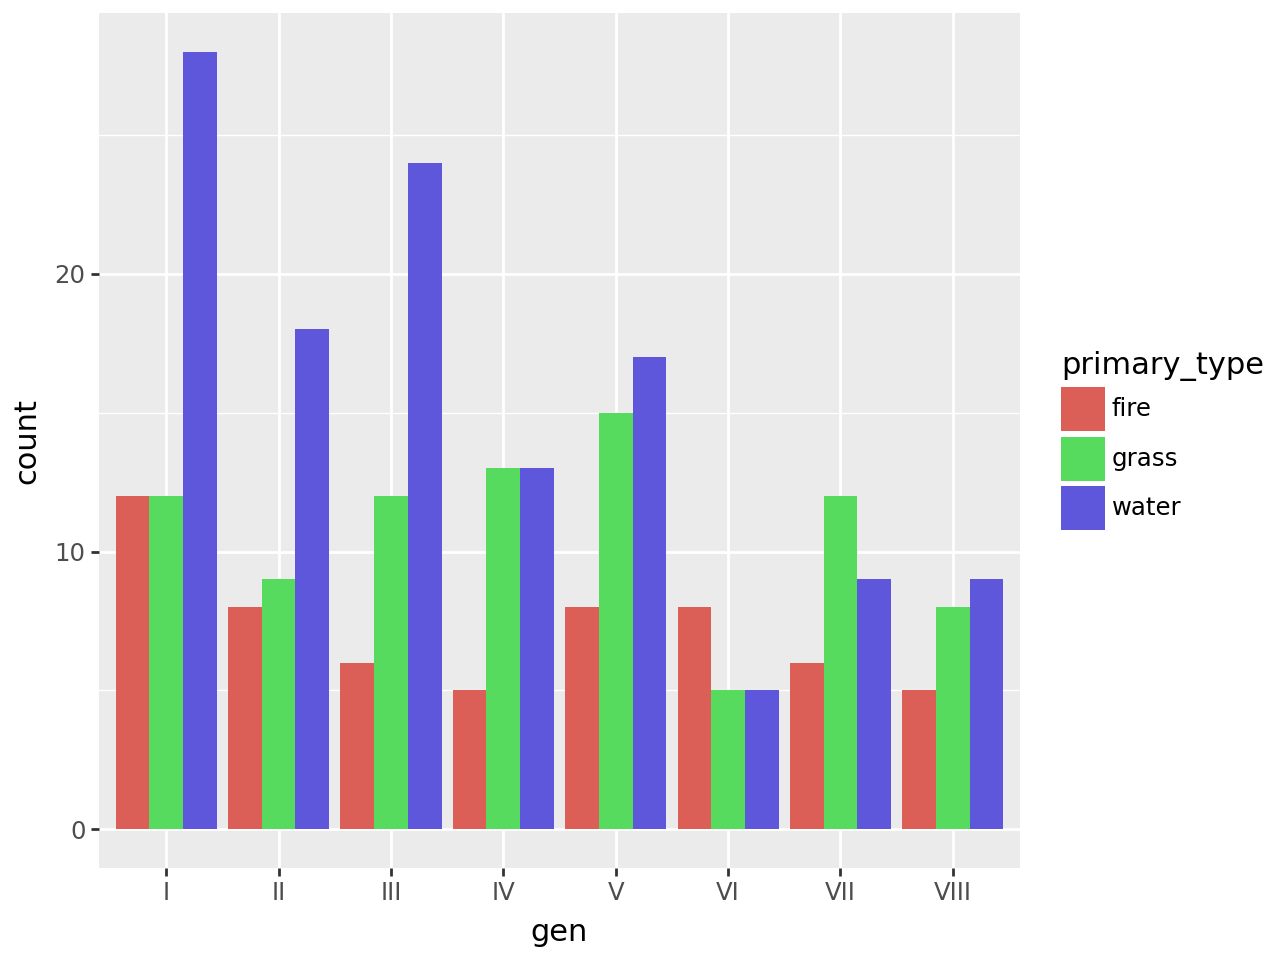

In [ ]:
# Expected Result

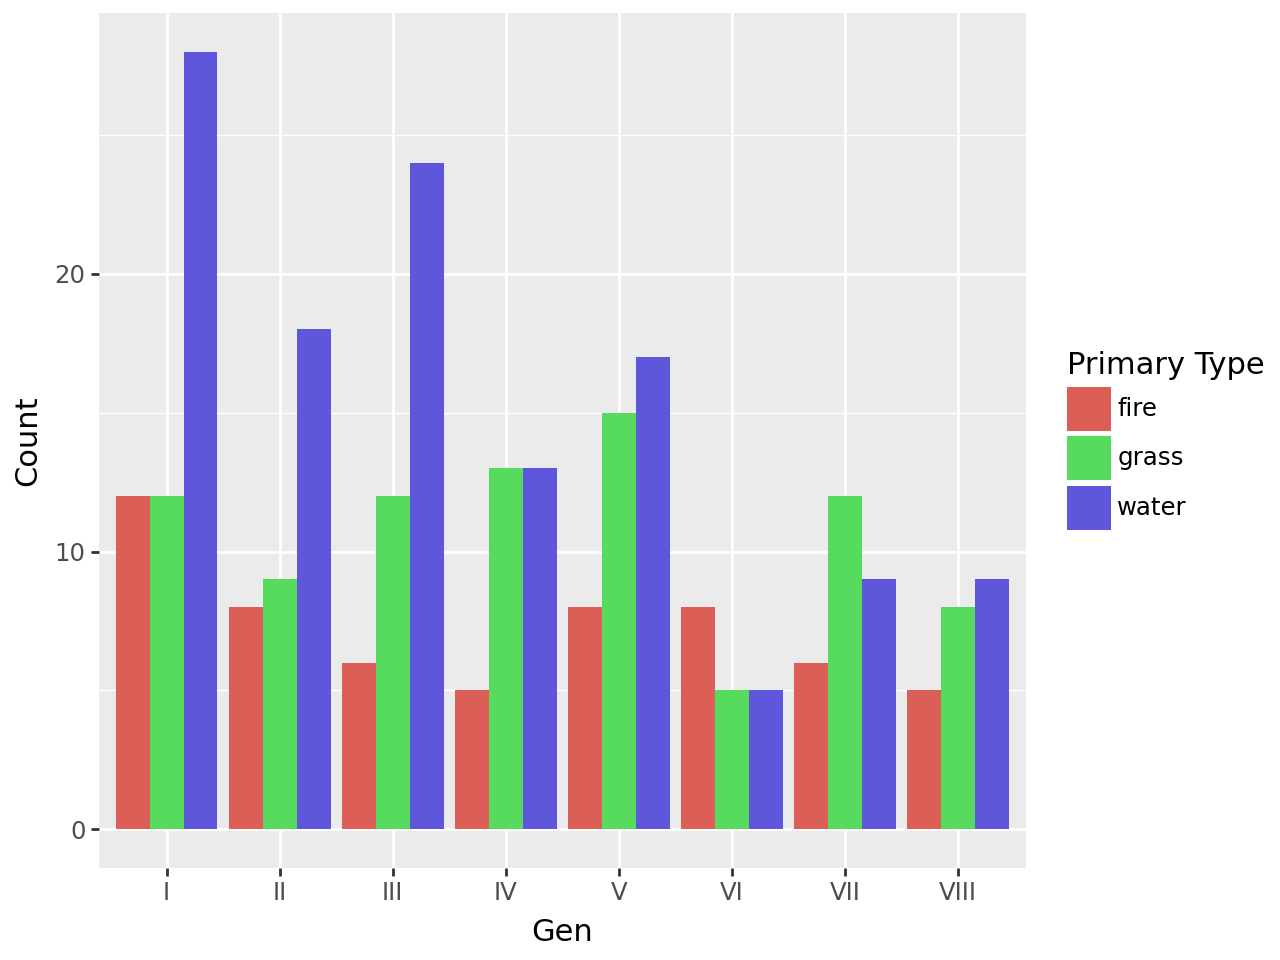

In [34]:
q5_data = pokemon[
    pokemon['primary_type'].isin(['fire', 'water', 'grass'])
]
(
    ggplot(q5_data, aes(x='gen', fill='primary_type'))
    + geom_bar(position='dodge')
    + labs(
        x='Gen',
        y='Count',
        fill='Primary Type'
    )
)